## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,6.0,3.0,6.0,95.0,7.0,34.0,63.0,354.0,5.0,152.0
1,6.0,3.0,5.0,83.0,3.0,32.0,63.0,352.0,5.0,150.0
2,5.0,3.0,8.0,83.0,4.0,33.0,71.0,343.0,10.0,152.0
3,8.0,3.0,10.0,98.0,9.0,37.0,66.0,339.0,4.0,167.0
4,6.0,5.0,7.0,85.0,12.0,28.0,61.0,324.0,2.0,169.0


In [3]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 10)
(12, 10)


In [5]:
multi_ar_p = MultivariatePoissonAutorregresion()
multi_ar_p.fit(train_data, verbose=True)

Fitting model 0/9
Model fited with p = 1 and q = 1 returns a cv_score of 6.4418101213157515
Model fited with p = 1 and q = 2 returns a cv_score of 6.4317630416744604
Model fited with p = 1 and q = 3 returns a cv_score of 6.425193168030233
Model fited with p = 1 and q = 4 returns a cv_score of 6.414811086202162
Model fited with p = 1 and q = 5 returns a cv_score of 6.332228889577964
Model fited with p = 1 and q = 6 returns a cv_score of 6.238710533188157
Model fited with p = 1 and q = 7 returns a cv_score of 6.145324620174513
Model fited with p = 1 and q = 8 returns a cv_score of 5.9868994487917515
Model fited with p = 1 and q = 9 returns a cv_score of 5.807438926017214
Model fited with p = 1 and q = 10 returns a cv_score of 5.674619836635388
Model fited with p = 1 and q = 11 returns a cv_score of 5.589718212834024
Model fited with p = 1 and q = 12 returns a cv_score of 4.046157060239534
Model fited with p = 2 and q = 1 returns a cv_score of 6.466557440591288
Model fited with p = 2 and 

time: 41m57.1s

In [6]:
fitted_values = multi_ar_p.fitted_values

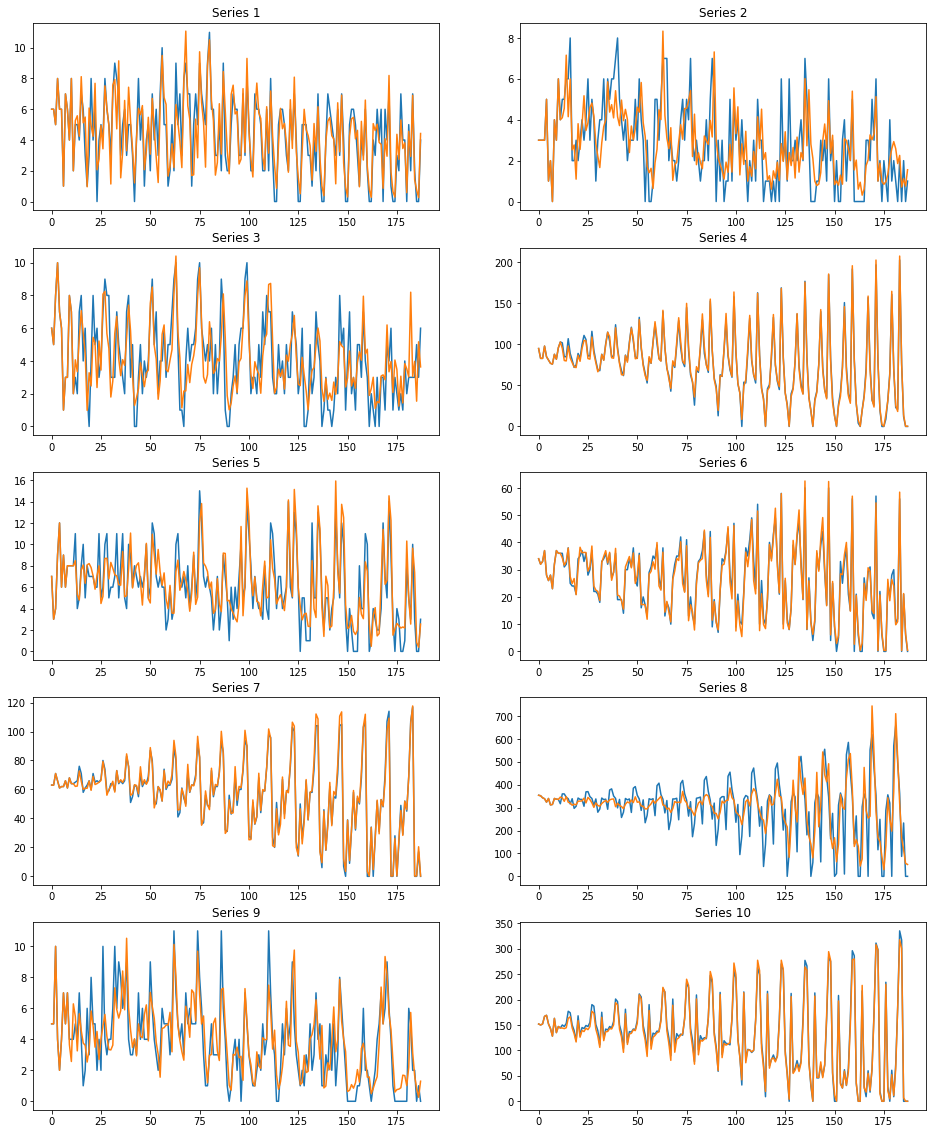

In [7]:
plot_fit(train_data, fitted_values, cols=2)

In [8]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)